**Task-3**

In [ ]:
#Create an application that should be used by the HR Team to filter the resume based on the Skills.

In [ ]:
import pandas as pd
df = pd.read_csv("SampleResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
df["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

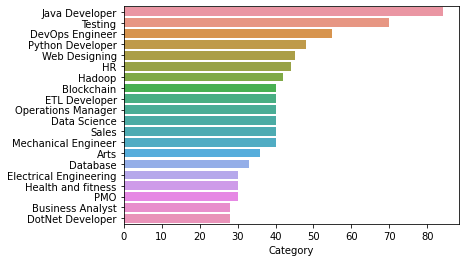

In [ ]:
import seaborn as sns
sns.barplot(y = df['Category'].value_counts()[:20].index,x = df['Category'].value_counts()[:20])

In [ ]:
#clean data
import re
import string
def clean_data(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('RT|cc', ' ', text)
  text = re.sub(r'[^\x00-\x7f]',r' ', text)
  return text

df["clean_resume"] = df.Resume.apply(lambda x: clean_data(x))

In [ ]:
df.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \rmay to may be uitrgpv\...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r mca ymcaust faridabad ...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1 = df.copy()
df1.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \rmay to may be uitrgpv\...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r mca ymcaust faridabad ...


In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stop_words = stopwords.words('english')
sentences = df1['Resume'].values
totalWords =[]
cleanedSentences = ""
for records in sentences:
  cleanedText = clean_data(records)
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in stop_words and word not in string.punctuation:
      totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('exprience', 3829), ('company', 3536), ('project', 3357), ('months', 3283), ('description', 3122), ('details', 3096), ('data', 2129), ('management', 1989), ('team', 1922), ('maharashtra', 1449), ('system', 1395), ('testing', 1339), ('year', 1332), ('database', 1274), ('business', 1191), ('development', 1187), ('less', 1145), ('test', 1140), ('using', 1124), ('ltd', 1118), ('skill', 1101), ('january', 1090), ('engineering', 1055), ('application', 1035), ('developer', 1033), ('pune', 1025), ('java', 1015), ('client', 1015), ('work', 987), ('sql', 957), ('services', 951), ('skills', 950), ('software', 871), ('responsibilities', 856), ('pvt', 821), ('reports', 814), ('sales', 801), ('process', 792), ('requirements', 790), ('technologies', 764), ('operations', 761), ('technical', 753), ('customer', 752), ('university', 751), ('server', 751), ('india', 750), ('monthscompany', 746), ('working', 745), ('various', 727), ('design', 715)]


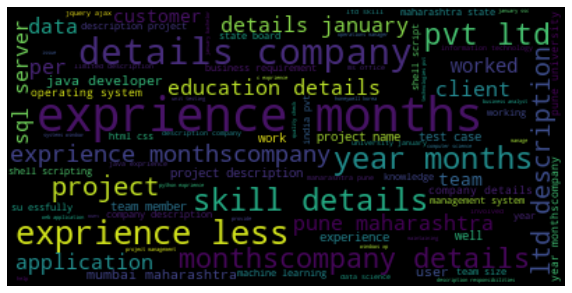

In [ ]:
import matplotlib.pyplot as plt
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['clean_resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7374)
(193, 7374)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [ ]:
from sklearn import metrics
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.80      0.80      0.80         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       0.89      1.00      0.94         8
                 Database       1.00      0.86      0.92         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.